In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle

# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [86]:
# acquire data using function in wrangle
df = wrangle.get_telco_data()

In [87]:
# data wrangling
df = wrangle.wrangle_telco(df)

There are no duplicate rows in your dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB
None


In [23]:
# quick look at df
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [24]:
# verify df has been prepped how we wanted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [25]:
# split the data before fitting scalers 

train, test = train_test_split(df, train_size=0.8, random_state=123)

In [26]:
train, validate = train_test_split(train, train_size=0.7, random_state=123)

In [27]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

#### Using MinMax Scaler on `total_charges`

In [28]:
# create the scaler
scaler_tc = MinMaxScaler()

In [29]:
# fit scaler
scaler_tc.fit(train[['total_charges']])

MinMaxScaler()

In [30]:
# fit and use scaler in single step
train['tc_minmax'] = scaler_tc.fit_transform(train[['total_charges']])

In [31]:
# look at the scaler we created
train[['total_charges', 'tc_minmax']].head()

,total_charges,tc_minmax
1256,4616.05,0.531337
225,3842.60,0.441924
662,1680.25,0.191948
628,1079.65,0.122517
824,1493.10,0.170313


> All values of `total_charges` between 0 and 1 after scaling

In [33]:
train[['tc_minmax']].describe().T

,count,mean,std,min,25%,50%,75%,max
tc_minmax,949.0,0.428889,0.30055,0.0,0.140782,0.414277,0.697367,1.0


In [114]:
# apply the saved scaler to our validate and test sets
validate['tc_minmax'] = scaler_tc.transform(validate[['total_charges']])
test['tc_minmax'] = scaler_tc.transform(test[['total_charges']])

### Visualize the distributions

The distributions will remain the same before and after scaling as we are only changing the range of x values to 0 and 1.

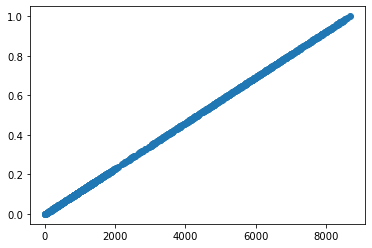

In [89]:
# looks like a linear relationship
plt.scatter(train.total_charges, train.tc_minmax)

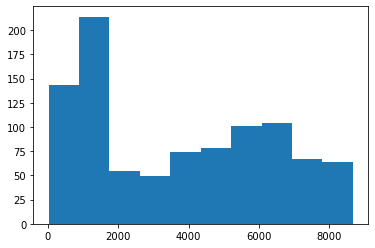

In [36]:
plt.hist(train['total_charges'])
plt.show()

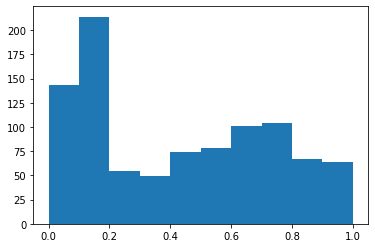

In [37]:
plt.hist(train['tc_minmax'])
plt.show()

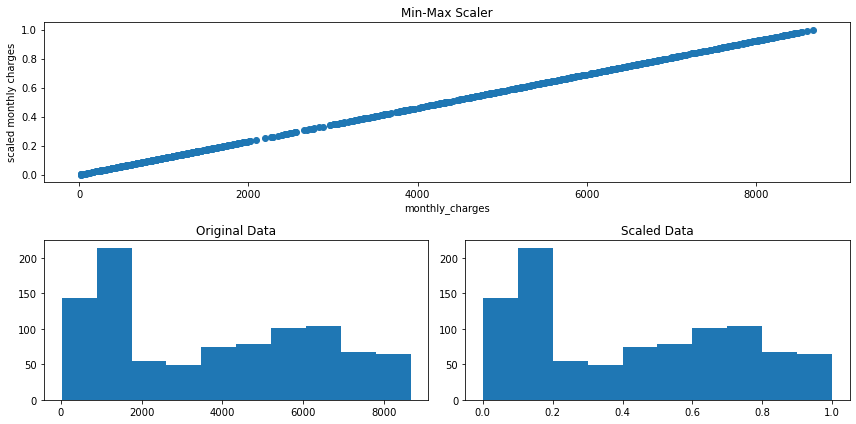

In [105]:
fig = plt.figure(figsize = (12,6))

# creating a 2 by 2 subplot but adding one big figure on top so using grid spec
gs = plt.GridSpec(2,2)


ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.total_charges, train.tc_minmax)
ax1.set(xlabel = 'monthly_charges', ylabel = 'scaled monthly charges', title= 'Min-Max Scaler')

ax2.hist(train.total_charges)
ax2.set(title = 'Original Data')

ax3.hist(train.tc_minmax)
ax3.set(title='Scaled Data')

plt.tight_layout()

In [110]:
# create a function to streamline the process
def visualize_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

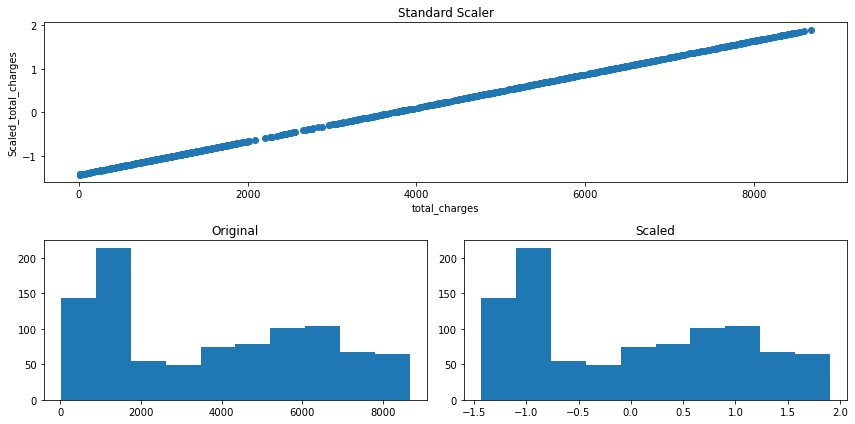

In [107]:
visualize_scaled_data(StandardScaler(), 'Standard Scaler', 'total_charges')

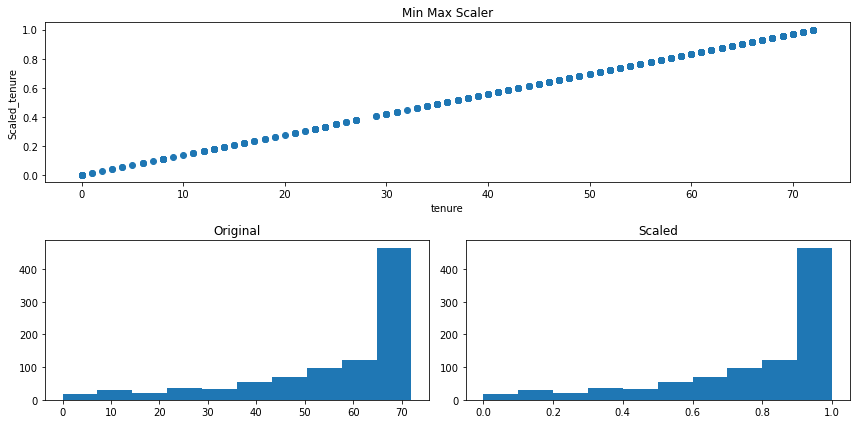

In [109]:
# scaling tenure using min max scaler within the function created above
visualize_scaled_data(MinMaxScaler(), 'Min Max Scaler', 'tenure')

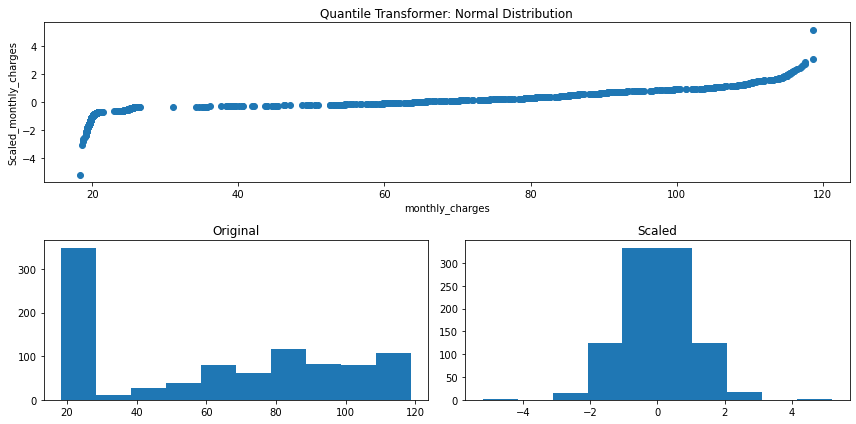

In [115]:
visualize_scaled_data(QuantileTransformer(output_distribution='normal'), 'Quantile Transformer: Normal Distribution', 'monthly_charges')

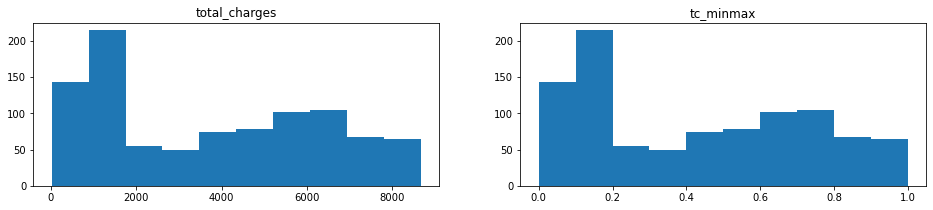

In [42]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['total_charges', 'tc_minmax']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,2, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    plt.hist(train[col])
    
    # Hide gridlines.
    plt.grid(False)

#### Using Standard Scaler on `monthly_charges`

In [44]:
# create the scaler
scaler_mc = StandardScaler()

In [46]:
# fit and use scaler
train['mc_standard'] = scaler_mc.fit_transform(train[['monthly_charges']])

In [47]:
# look at the scaler we created
train[['monthly_charges', 'mc_standard']].head()

,monthly_charges,mc_standard
1256,73.80,0.361757
225,69.05,0.225110
662,24.90,-1.044987
628,19.55,-1.198894
824,24.45,-1.057932


In [48]:
train[['mc_standard']].describe().T

,count,mean,std,min,25%,50%,75%,max
mc_standard,949.0,1.424923e-16,1.000527,-1.231977,-1.101084,0.09997,0.839302,1.651991


> Standard Scaler will scale the distribution such that the it resembles a normal distribution with a mean of 0 and a standard deviation of 1 which is what we see here.

In [116]:
# apply the saved scaler to our validate and test sets
validate['mc_standard'] = scaler_tc.transform(validate[['monthly_charges']])
test['mc_standard'] = scaler_tc.transform(test[['monthly_charges']])

### Visualize the distributions


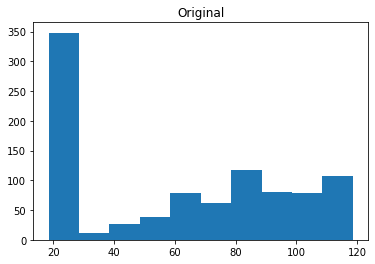

In [53]:
plt.hist(train['monthly_charges'])
plt.title('Original')
plt.show()

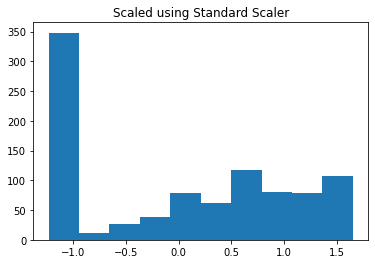

In [52]:
plt.hist(train['mc_standard'])
plt.title('Scaled using Standard Scaler')
plt.show()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [76]:
# fit and use the scaler
train['inv_mc'] =  scaler_mc.inverse_transform(train['mc_standard'])

In [80]:
train[['monthly_charges','mc_standard','inv_mc']].head()

,monthly_charges,mc_standard,inv_mc
1256,73.80,0.361757,73.80
225,69.05,0.225110,69.05
662,24.90,-1.044987,24.90
628,19.55,-1.198894,19.55
824,24.45,-1.057932,24.45


### Visualize the distribution

> The distribution of inverse transformed scaled data will be the same as original distribution before scaling.

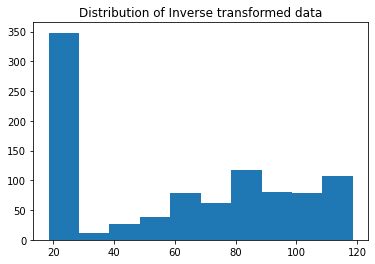

In [82]:
# plot histogram to see the distribution
plt.hist(train['inv_mc'])
plt.title('Distribution of Inverse transformed data')
plt.show()

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [103]:
# more useful if you want to perform analysis/testing that requires normality

In [58]:
# create the scaler
scaler_qt = QuantileTransformer(output_distribution='normal')

In [117]:
# fit and use scaler
train['mc_qt'] = scaler_qt.fit_transform(train[['monthly_charges']])

In [60]:
# look at the scaler we created
train[['monthly_charges', 'mc_qt']].head()

,monthly_charges,mc_qt
1256,73.80,0.164677
225,69.05,0.079407
662,24.90,-0.530174
628,19.55,-1.618824
824,24.45,-0.587360


In [61]:
train[['mc_qt']].describe().T

,count,mean,std,min,25%,50%,75%,max
mc_qt,949.0,0.000397,1.021454,-5.199338,-0.67449,5.565833e-16,0.67449,5.199338


## Viz

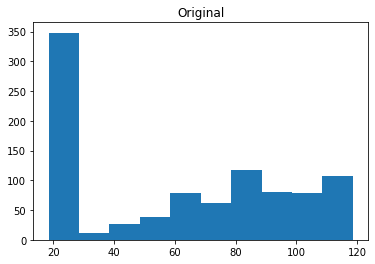

In [62]:
plt.hist(train['monthly_charges'])
plt.title('Original')
plt.show()

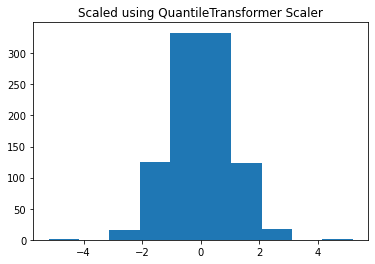

In [64]:
plt.hist(train['mc_qt'])
plt.title('Scaled using QuantileTransformer Scaler')
plt.show()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [65]:
# create the scaler
scaler_qt1 = QuantileTransformer()

In [118]:
# fit and use scaler
train['mc_qt1'] = scaler_qt1.fit_transform(train[['monthly_charges']])

In [67]:
# look at the scaler we created
train[['monthly_charges', 'mc_qt1']].head()

,monthly_charges,mc_qt1
1256,73.80,0.565401
225,69.05,0.531646
662,24.90,0.297996
628,19.55,0.052743
824,24.45,0.278481


In [68]:
train[['mc_qt1']].describe().T

,count,mean,std,min,25%,50%,75%,max
mc_qt1,949.0,0.500087,0.289137,0.0,0.25,0.5,0.75,1.0


## Viz

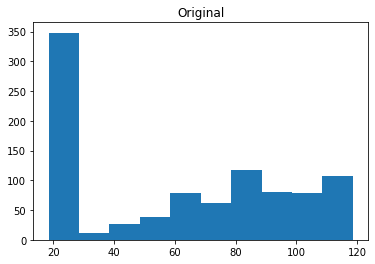

In [69]:
plt.hist(train['monthly_charges'])
plt.title('Original')
plt.show()

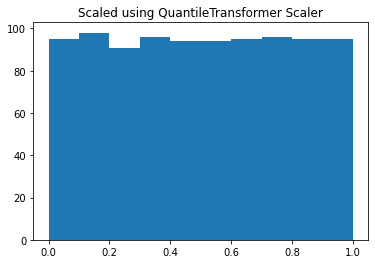

In [70]:
plt.hist(train['mc_qt1'])
plt.title('Scaled using QuantileTransformer Scaler')
plt.show()

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

I think using minmax scaling would be best since we don't want negative values for tenure or charges. Since the sample size is large enough to meet the assumption of normality (CLT) we don't need to normalize the distribution using a scaler.

no extreme outliers - so dont need robust scaler

data does not look super normally distributed - so don't need to use standard scaler

In [96]:
def Min_Max_scaler_telco(X_train, X_validate, X_test):
    '''
    Takes in 3 pandas dataframes of X_train, X_validate and X_test. Then returns the 
    scaler object as well as the transformed dfs
    
    This function assumes the independent variables being fed in as arguments
    are all continuous features
    '''
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index,
                                 columns=X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index=X_validate.index,
                                 columns=X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index,
                                 columns=X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled
    

In [102]:
# adding features we want to be scaled
X_train = train[['monthly_charges', 'tenure']]
X_validate = validate[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [100]:
# Use function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_scaler_telco(X_train, X_validate, X_test)

In [101]:
X_train_scaled.head()

,monthly_charges,tenure
1256,0.552618,0.847222
225,0.505237,0.763889
662,0.064838,0.930556
628,0.011471,0.805556
824,0.060349,0.819444
